In [28]:
#manage packages

import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read in data

This data was downloaded from Kaggle. 

Link: https://www.kaggle.com/datasets/tristan581/17k-apple-app-store-strategy-games/code

In [21]:
apps = pd.read_csv("appstore_games.csv")

In [22]:
apps.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


# Data Cleaning

In [23]:
#let's rename some of these columns just for ease of access

apps.rename(columns = {"Icon URL": "icon", "Average User Rating": "ave_rating", "User Rating Count": "rating_count"}, inplace=True)

apps.head()

,URL,ID,Name,Subtitle,icon,ave_rating,rating_count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


# Initial Cool Graphs

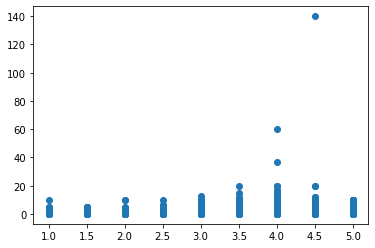

In [29]:
plt.scatter(apps["ave_rating"], apps["Price"])

It looks like there are some quite odd outliers in the price category... let's examine that a bit further.

In [46]:
print(np.unique(apps["Price"]))

apps["Price"].isna().sum()/len(apps)

#only about a 0.1% missing rate for price. Let's remove these NAs

apps=apps.dropna(subset=["Price"])


[  0.     0.99   1.99   2.99   3.99   4.99   5.99   6.99   7.99   8.99
   9.99  11.99  12.99  14.99  16.99  18.99  19.99  29.99  36.99  37.99
  59.99  99.99 139.99 179.99    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan]


In [47]:
apps["Price"].isna().sum()/len(apps)

#this worked


0.0

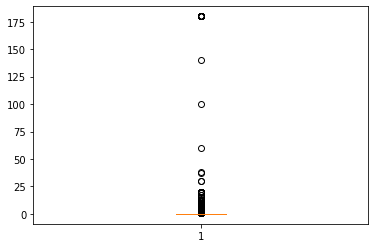

In [49]:
plt.boxplot(apps["Price"])
plt.show()

#very heavy skew. Let's consider removing these outliers for the sake of a nicer scatterplot. 

In [50]:
# Before we remove, we should look at how many observations we would remove

apps["Price"].value_counts()

# for some reason, there are 30 apps priced at 180 dollars... this is quite interesting and 

0.00      14212
0.99       1078
1.99        515
2.99        471
4.99        237
3.99        163
9.99         88
11.99        59
5.99         42
6.99         32
179.99       30
7.99         17
8.99         13
19.99         9
14.99         4
12.99         3
16.99         2
29.99         2
139.99        1
99.99         1
37.99         1
36.99         1
18.99         1
59.99         1
Name: Price, dtype: int64

for some reason, there are 30 apps priced at 180 dollars... this is quite interesting and perhaps another question we can answer. For right now, let's limit our analyses to apps under 15 dollars.

In [54]:
apps_under_ten = apps[apps.Price < 15.00]

len(apps_under_ten)/len(apps)
#removed a very small portion of observations

0.9971147618206442

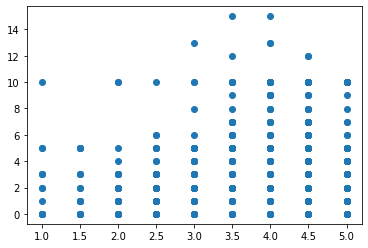

In [56]:
#let's try that scatterplot again

plt.scatter(apps_under_ten["ave_rating"], apps_under_ten["Price"])